In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline

In [2]:
%%time
# df = pd.read_csv(
#             'final_STC_dataset.csv',
#             index_col=[0],
#             parse_dates=['date_'],
#             dtype={ 
#                 'user_id_maped': np.uint16, # Unsigned integer (0 to 65535)
#                 'program_id': str,
#                 'program_name': str,
#                 'duration_seconds': np.uint32, # Unsigned integer (0 to 4294967295)
#                 'program_class': 'category',
#                 'season': np.uint8, # Unsigned integer (0 to 255)
#                 'episode': np.uint16, # Unsigned integer (0 to 65535)
#                 'program_desc': str,
# #                 'program_genre': 'category',
#                 'hd': bool, 
#                 'original_name': str,
#                 'series_title': bool
#             }
# )
# df.head()
df = pd.read_csv(
            'final_STC_dataset2.csv',
            parse_dates=['date_'],
            dtype={ 
                'user_id_maped': np.uint16, # Unsigned integer (0 to 65535)
                'program_id': str,
                'program_name': str,
                'original_name': str,
                'program_class': 'category',
                'season': np.uint8, # Unsigned integer (0 to 255)
                'episode': np.uint16, # Unsigned integer (0 to 65535)
                'program_desc': str,
                'program_genre': 'category',
                'series_title': bool,
                'hd': bool, 
                'title': str,
                'duration_minutes': np.float32,
                'total_runtime': np.float32,
                'user_rating': np.float32,
                'avg_rating': np.float32,
                'content_rating': 'category',
                'age_group': 'category'
            })

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926174 entries, 0 to 3926173
Data columns (total 19 columns):
date_               datetime64[ns]
user_id_maped       uint16
program_id          object
program_name        object
original_name       object
program_class       category
season              uint8
episode             uint16
program_desc        object
program_genre       category
series_title        bool
hd                  bool
title               object
duration_minutes    float32
total_runtime       float32
user_rating         float32
avg_rating          float32
content_rating      category
age_group           category
dtypes: bool(2), category(4), datetime64[ns](1), float32(4), object(5), uint16(2), uint8(1)
memory usage: 280.8+ MB
Wall time: 14.3 s


## Exploratory Data Analysis

### Genre Distribution 

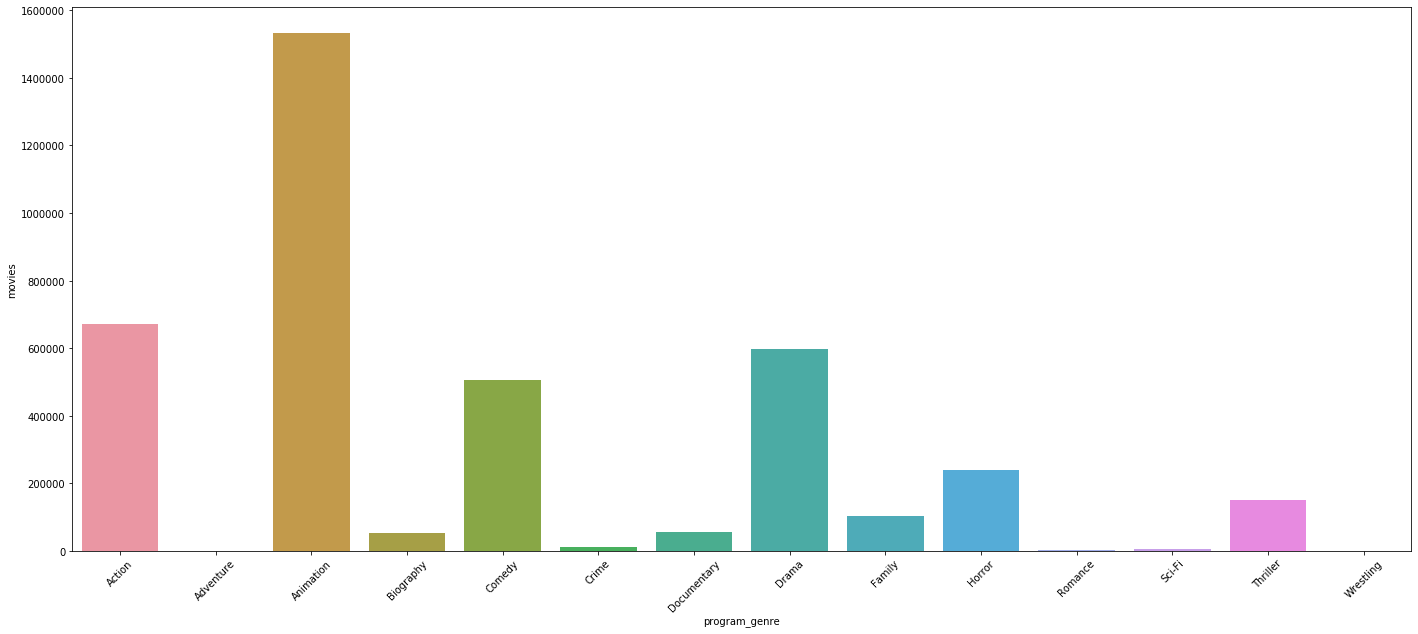

In [5]:
genres = df.program_genre.value_counts()
genres_count = pd.DataFrame(df.program_genre.value_counts()).reset_index()
genres_count.columns = ['program_genre', 'movies']
genres_count = genres_count.sort_values(['movies'], ascending=False)
plt.figure(figsize=(24, 10))
g = sns.barplot(x='program_genre', y='movies', data=genres_count.head(15))
plt.setp(g.get_xticklabels(), rotation=45);

### Content Rating Distribution

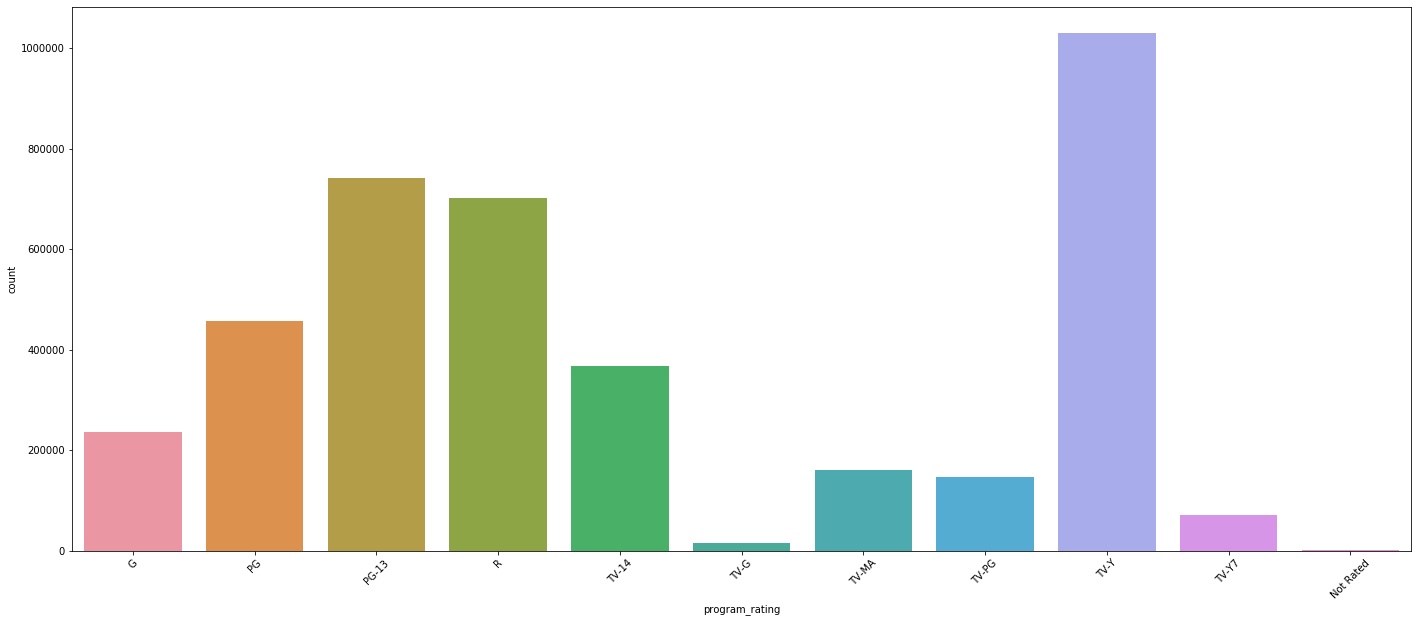

In [6]:
rating_count = pd.DataFrame(df.content_rating.value_counts()).reset_index()
rating_count.columns = ['program_rating', 'count']
rating_count = rating_count.sort_values(['count'], ascending=False)
plt.figure(figsize=(24, 10))
g = sns.barplot(x='program_rating', y='count', data=rating_count)
plt.setp(g.get_xticklabels(), rotation=45);

### Explorations for random users
#### Genres VS Age

In [7]:
users = df.groupby('user_id_maped')

users_genres = users.program_genre.value_counts()
users_genres_df = pd.DataFrame(users_genres)
users_genres_df = users_genres_df.add_suffix('_Count').reset_index()

users_content_rating = users.age_group.value_counts()
users_content_rating_df = pd.DataFrame(users_content_rating)
users_content_rating_df = users_content_rating_df.add_suffix('_Count').reset_index()

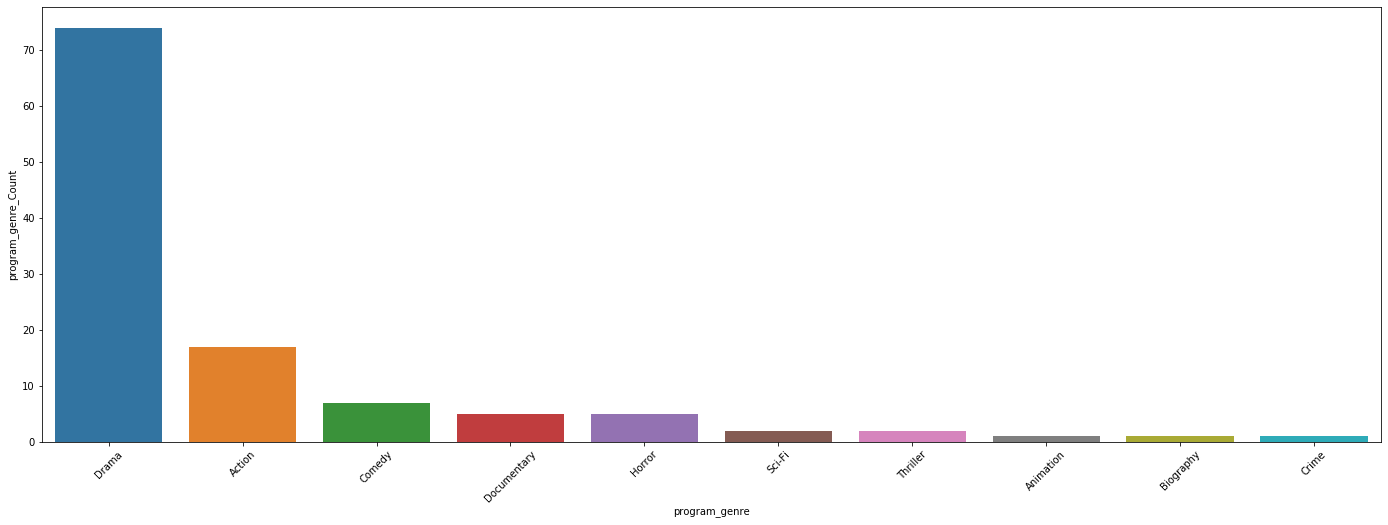

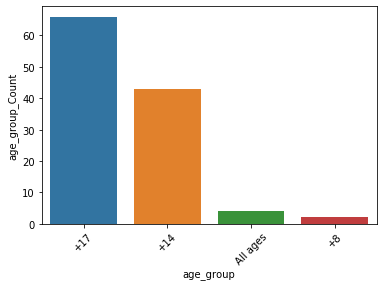

In [8]:
plt.figure(figsize=(24, 8))

g = sns.barplot(
        data=users_genres_df[users_genres_df.user_id_maped == 6520], 
        x='program_genre', 
        y='program_genre_Count', 
)
plt.setp(g.get_xticklabels(), rotation=45);
plt.show()
g = sns.barplot(
        data=users_content_rating_df[users_content_rating_df.user_id_maped == 6520], 
        x='age_group', 
        y='age_group_Count', 
)
plt.setp(g.get_xticklabels(), rotation=45);
plt.show()

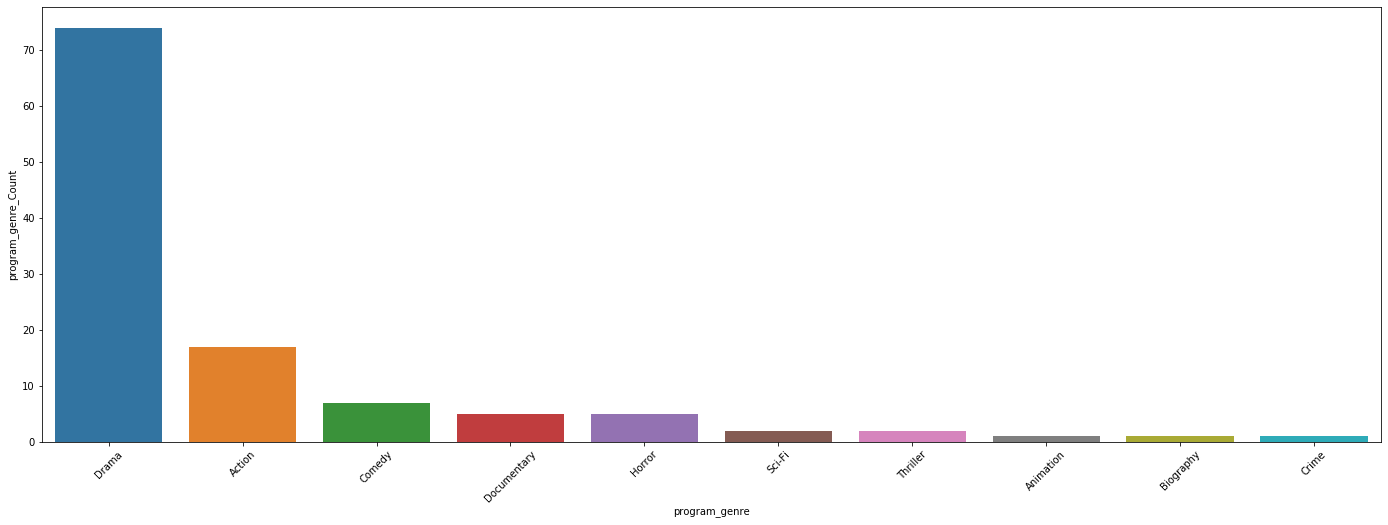

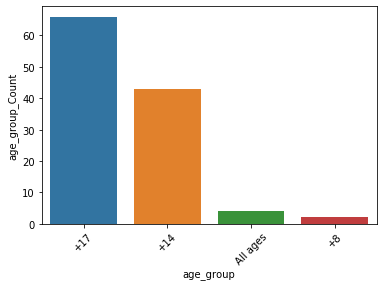

In [9]:
plt.figure(figsize=(24, 8))

g = sns.barplot(
        data=users_genres_df[users_genres_df.user_id_maped == 6520], 
        x='program_genre', 
        y='program_genre_Count', 
)
plt.setp(g.get_xticklabels(), rotation=45);
plt.show()
g = sns.barplot(
        data=users_content_rating_df[users_content_rating_df.user_id_maped == 6520], 
        x='age_group', 
        y='age_group_Count', 
)
plt.setp(g.get_xticklabels(), rotation=45);
plt.show()

In [10]:
df.head()

,date_,user_id_maped,program_id,program_name,original_name,program_class,season,episode,program_desc,program_genre,series_title,hd,title,duration_minutes,total_runtime,user_rating,avg_rating,content_rating,age_group
0,2017-08-16,6928,M0009670,The Boss Baby,The Boss Baby,MOVIE,0,0,Animation MovieThe Boss Baby (HD),Animation,False,True,The Boss Baby,0.280000,96.940002,1.5,6.1,TV-Y,2-6
1,2017-05-27,26138,M0005792SD,100 Streets,100 Streets,MOVIE,0,0,Drama Movie100 Streets,Drama,False,False,100 Streets,0.670000,92.940002,1.5,6.2,TV-14,+14
2,2017-09-16,19082,S000805901001,Heroes Reborn Brave New World,Heroes Reborn,SERIES/EPISODES,1,1,Drama MovieBrave New World (HD),Drama,False,False,Heroes Reborn,28.200001,60.000000,4.7,6.7,TV-14,+14
3,2017-05-21,7946,M0004410,Moana,Moana,MOVIE,0,0,Animation MovieMoana (HD),Animation,False,True,Moana,0.280000,107.059998,1.5,7.3,PG,+8
4,2017-08-10,7418,M0005895,The Mermaid Princess,The Mermaid Princess,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,False,True,The Mermaid Princess,0.130000,77.000000,1.5,4.4,PG,+8


### Date vs Programs

In [11]:
df['YearMonth'] = pd.to_datetime(df['date_']).apply(lambda x: '{month}-{year}'.format(month=x.month, year=x.year))

In [12]:
df.head()

,date_,user_id_maped,program_id,program_name,original_name,program_class,season,episode,program_desc,program_genre,series_title,hd,title,duration_minutes,total_runtime,user_rating,avg_rating,content_rating,age_group,YearMonth
0,2017-08-16,6928,M0009670,The Boss Baby,The Boss Baby,MOVIE,0,0,Animation MovieThe Boss Baby (HD),Animation,False,True,The Boss Baby,0.280000,96.940002,1.5,6.1,TV-Y,2-6,8-2017
1,2017-05-27,26138,M0005792SD,100 Streets,100 Streets,MOVIE,0,0,Drama Movie100 Streets,Drama,False,False,100 Streets,0.670000,92.940002,1.5,6.2,TV-14,+14,5-2017
2,2017-09-16,19082,S000805901001,Heroes Reborn Brave New World,Heroes Reborn,SERIES/EPISODES,1,1,Drama MovieBrave New World (HD),Drama,False,False,Heroes Reborn,28.200001,60.000000,4.7,6.7,TV-14,+14,9-2017
3,2017-05-21,7946,M0004410,Moana,Moana,MOVIE,0,0,Animation MovieMoana (HD),Animation,False,True,Moana,0.280000,107.059998,1.5,7.3,PG,+8,5-2017
4,2017-08-10,7418,M0005895,The Mermaid Princess,The Mermaid Princess,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,False,True,The Mermaid Princess,0.130000,77.000000,1.5,4.4,PG,+8,8-2017


In [13]:
date_program_df = df.groupby('YearMonth',as_index=False).agg({'title': 'count'})
date_program_df.head()

,YearMonth,title
0,1-2018,327413
1,10-2017,240122
2,11-2017,341076
3,12-2017,319889
4,2-2018,297058


In [14]:
date_program_df['YearMonth'] = pd.to_datetime(date_program_df['YearMonth'])

In [15]:
date_program_df = date_program_df.sort_values(by='YearMonth')

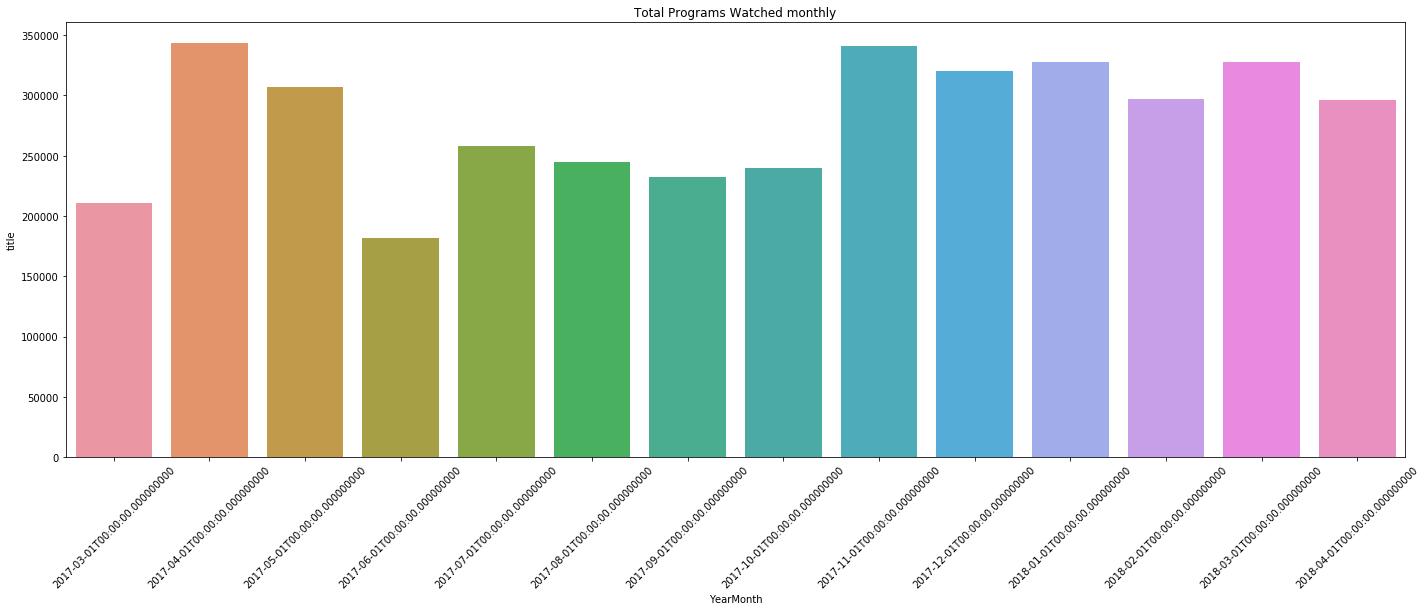

In [26]:
plt.figure(figsize=(24, 8))

g = sns.barplot(
        data=date_program_df, 
        x='YearMonth', 
        y='title', 
)
plt.setp(g.get_xticklabels(), rotation=45);
plt.title('Total Programs Watched monthly')
plt.show()

In [18]:
month_df = df
month_df['month'] = pd.DatetimeIndex(df['date_']).month
month_df.head()

,date_,user_id_maped,program_id,program_name,original_name,program_class,season,episode,program_desc,program_genre,...,hd,title,duration_minutes,total_runtime,user_rating,avg_rating,content_rating,age_group,YearMonth,month
0,2017-08-16,6928,M0009670,The Boss Baby,The Boss Baby,MOVIE,0,0,Animation MovieThe Boss Baby (HD),Animation,...,True,The Boss Baby,0.280000,96.940002,1.5,6.1,TV-Y,2-6,8-2017,8
1,2017-05-27,26138,M0005792SD,100 Streets,100 Streets,MOVIE,0,0,Drama Movie100 Streets,Drama,...,False,100 Streets,0.670000,92.940002,1.5,6.2,TV-14,+14,5-2017,5
2,2017-09-16,19082,S000805901001,Heroes Reborn Brave New World,Heroes Reborn,SERIES/EPISODES,1,1,Drama MovieBrave New World (HD),Drama,...,False,Heroes Reborn,28.200001,60.000000,4.7,6.7,TV-14,+14,9-2017,9
3,2017-05-21,7946,M0004410,Moana,Moana,MOVIE,0,0,Animation MovieMoana (HD),Animation,...,True,Moana,0.280000,107.059998,1.5,7.3,PG,+8,5-2017,5
4,2017-08-10,7418,M0005895,The Mermaid Princess,The Mermaid Princess,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,...,True,The Mermaid Princess,0.130000,77.000000,1.5,4.4,PG,+8,8-2017,8


In [20]:
titles_df = month_df.filter(['title','month'], axis = 1)
titles_full_df = month_df.filter(['title','YearMonth'], axis = 1)

In [21]:
#Top 15 programs Monthly

firstmonth = titles_full_df[titles_full_df['YearMonth'] == '3-2017']
fm = firstmonth['title'].value_counts()
fm = fm.rename_axis('title').reset_index(name='counts')
fmdf = fm.head(15)


Text(0.5, 1.0, 'Top 15 Watched Programs')

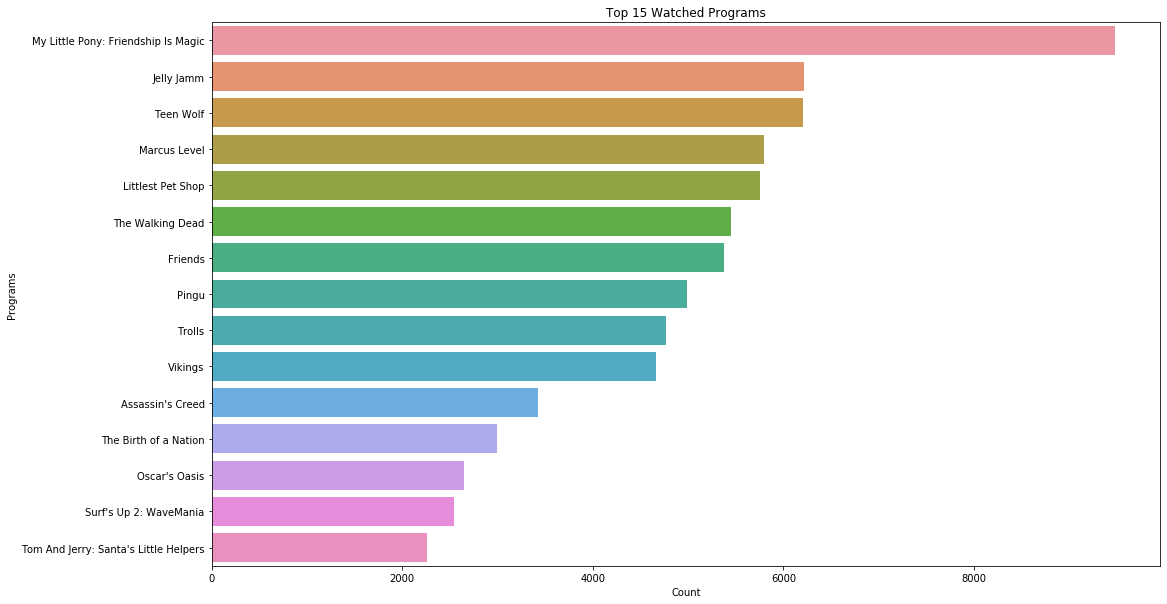

In [23]:
#visualize top 15
plt.figure(figsize=(17, 10))
ax = sns.barplot(x = 'counts', y = 'title',
            data=fmdf)
ax.set(xlabel='Count', ylabel='Programs')
plt.title('Top 15 Watched Programs')

### Program Class: Movies vs Series

In [24]:
#movies dataframe
movies = df.loc[df['program_class'] == 'MOVIE']
#series
series = df.loc[df['program_class'] == 'SERIES/EPISODES']

Text(0.5, 1.0, 'Top 5 Watched Movies')

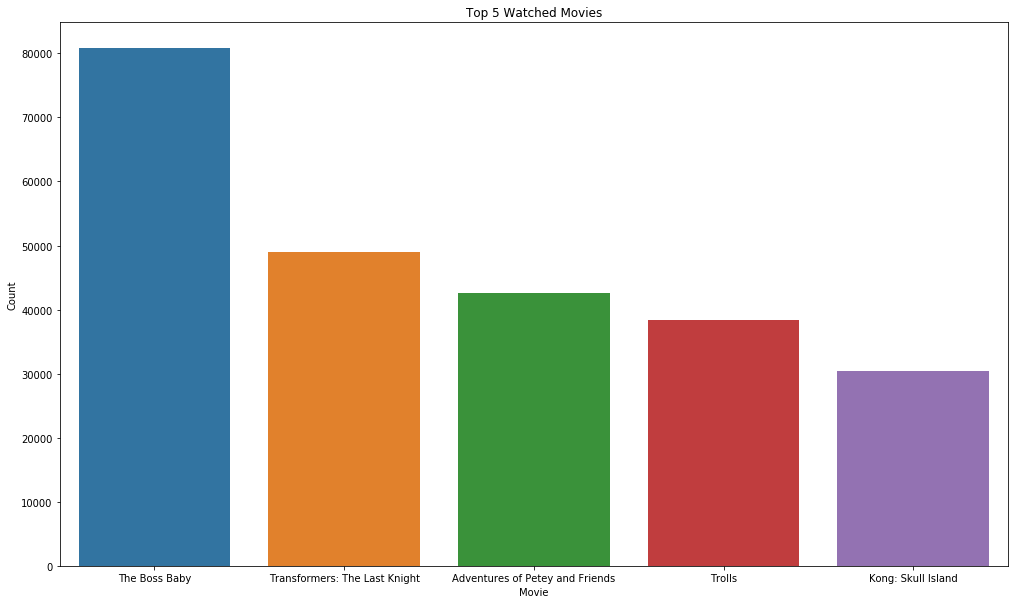

In [33]:
plt.figure(figsize=(17, 10))

ax = sns.countplot(x = "program_name", data = movies,
              order = movies.program_name.value_counts().iloc[:5].index)

ax.set(xlabel='Movie', ylabel='Count')
plt.title('Top 5 Watched Movies')

Text(0.5, 1.0, 'Top 5 Watched Series')

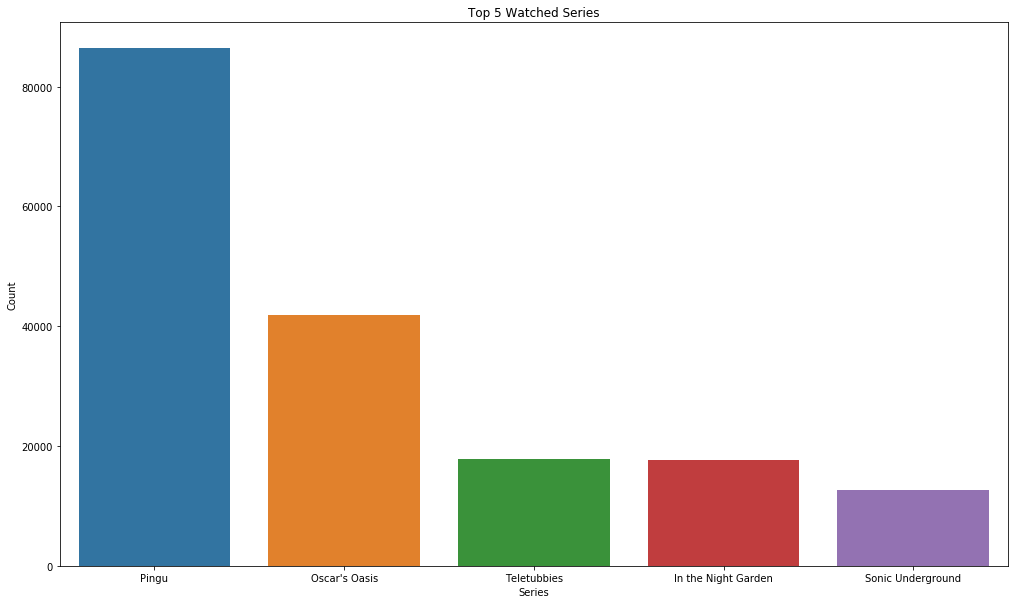

In [30]:
plt.figure(figsize=(17, 10))

ax = sns.countplot(x = "program_name", data = series,
              order = series.program_name.value_counts().iloc[:5].index)

ax.set(xlabel = 'Series', ylabel = 'Count')
plt.title('Top 5 Watched Series')